<tr>
    <td>
        <div align = "left">
            <font size=25px>
                <b>Phising Website Detections</b>
            </font>
        </div>
    </td>
</tr>

# **Data Definitions for Phishing Website Detection**

**🔹 Dataset & Preprocessing**

1. **pandas** - A Python library used for data manipulation and analysis, handling tabular data efficiently.

2. **numpy** - A numerical computing library used for mathematical operations and handling arrays.

3. **seaborn** - A visualization library built on Matplotlib, used for statistical data visualization.

4. **matplotlib.pyplot** - A plotting library used for generating charts, graphs, and visualizations.

5. **pd.read_csv()** - Reads a CSV file and loads the dataset into a Pandas DataFrame.

6. **data.info()** - Displays metadata of the dataset, including column types and missing values.

7. **data.describe()** - Generates a statistical summary of the dataset (mean, std, min, max, etc.).

8. **data.isnull().sum()** - Checks for missing values in each column of the dataset.

9. **data.dropna()** - Removes missing values from the dataset to ensure model consistency.

10. **data.astype(int)** - Converts data types (e.g., categorical to numerical) for machine learning compatibility.

**🔹 Feature Engineering**

11. **URL_Length** - Number of characters in the URL (long URLs can be suspicious).

12. **Num_Dots** - Count of dot (.) characters in the URL (phishing URLs often use multiple subdomains).

13. **Num_Hyphens** - Count of hyphen (-) characters (common in misleading domain names).

14. **Num_Slashes** - Number of forward slashes (/) in the URL (deep nested URLs can be suspicious).

15. **HTTPS_Usage** - Binary (0 or 1), indicating if the site uses HTTPS (secure websites usually do).

16. **Domain_Age** - Age of the domain in months (older domains are typically more trustworthy).

17. **Alexa_Rank** - The global rank of the website (low rank means higher credibility).

18. **IP_Address_Present** - Checks if the URL contains an IP address instead of a domain name.

19. **Shortening_Service** - Binary (0 or 1), detects if the URL uses link shorteners (bit.ly, tinyurl, etc.).

20. **SSL_Certificate** - Binary (0 or 1), checks if the SSL certificate is valid and issued by a trusted authority.

**🔹 Data Visualization**

21. **sns.countplot()** - Creates a count plot for categorical variables (e.g., phishing vs. legitimate).

22. **sns.heatmap()** - Generates a heatmap to show feature correlations.

23. **data.boxplot()** - Creates a box plot for detecting outliers in numerical columns.

24. **sns.pairplot()** - Plots pairwise relationships in the dataset with density estimation.

**🔹 Model Training & Evaluation**

25. **train_test_split()** - Splits the dataset into training and testing sets.

26. **GaussianNB** - A Naïve Bayes classifier based on the assumption of Gaussian (Normal) distribution.

27. **model.fit()** - Trains the Naïve Bayes model using the training data.
28. **model.predict()** - Generates predictions for test data.

29. **accuracy_score()** - Measures the accuracy of predictions compared to actual labels.

30. **classification_report()** - Provides precision, recall, F1-score, and support metrics for model evaluation.

31. **confusion_matrix()** - Computes a matrix comparing predicted and actual labels.

**🔹 Hyperparameter Tuning**

32. **GridSearchCV** - A technique to find the best hyperparameters using cross-validation.

33. **param_grid** - A dictionary defining the range of hyperparameters for tuning.

34. **best_params_** - Stores the best parameter values obtained from GridSearchCV.

35. **var_smoothing** - A parameter in Naïve Bayes that controls how much smoothing is applied to avoid zero probabilities.

**🔹 Model Performance Visualization**

36. **plt.figure(figsize=(6, 4))** - Sets the figure size for the confusion matrix visualization.

37. **sns.heatmap(confusion_matrix(), annot=True)** - Displays the confusion matrix as a heatmap.

38. **xticklabels, yticklabels** - Labels for the X and Y axes in the confusion matrix plot.

**🔹 Target Variable**
39. **Phishing (Target Variable)** - The final classification (0 = Legitimate, 1 = Phishing).


# Step 1: Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Loading Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/RV Tech Projects/11-Naive Bayes'  and Decision Tree Models/Naive Bayes' Model/Advanced Naive Bayes' Model/phising_website_detection.csv")

# Step 3: Data Information and Statistics

In [ ]:
data.head(20)

,Unnamed: 0,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising
0,0,3,72,0,0,0,0,5,44,0,1.0
1,1,3,144,0,0,0,0,3,16,41,1.0
2,2,3,58,0,0,0,0,2,24,0,1.0
3,3,3,79,1,0,0,0,6,50,0,1.0
4,4,3,46,0,0,0,0,4,29,2,1.0
5,5,3,42,1,0,0,0,1,12,0,1.0
6,6,2,60,0,0,0,0,5,36,1,1.0
7,7,1,30,0,0,0,0,3,11,3,1.0
8,8,8,76,1,0,0,0,2,4,2,1.0
9,9,2,46,0,0,0,0,2,25,0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662591 entries, 0 to 662590
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       662591 non-null  int64  
 1   NumDots          662591 non-null  int64  
 2   UrlLength        662591 non-null  int64  
 3   NumDash          662591 non-null  int64  
 4   AtSymbol         662591 non-null  int64  
 5   IpAddress        662591 non-null  int64  
 6   HttpsInHostname  662591 non-null  int64  
 7   PathLevel        662591 non-null  int64  
 8   PathLength       662591 non-null  int64  
 9   NumNumericChars  662591 non-null  int64  
 10  Phising          630071 non-null  float64
dtypes: float64(1), int64(10)
memory usage: 55.6 MB


In [ ]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Unnamed: 0             0
NumDots                0
UrlLength              0
NumDash                0
AtSymbol               0
IpAddress              0
HttpsInHostname        0
PathLevel              0
PathLength             0
NumNumericChars        0
Phising            32520
dtype: int64


In [ ]:
data.describe()

,Unnamed: 0,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising
count,662591.000000,662591.000000,662591.000000,662591.000000,662591.000000,662591.000000,662591.000000,662591.000000,662591.000000,662591.000000,630071.000000
mean,331295.000000,2.195062,60.254036,1.551831,0.002185,0.011283,0.025989,2.791045,40.996062,0.652540,0.158730
std,191273.690443,1.490275,44.597468,2.973611,0.053758,0.105620,0.162509,1.625727,29.722431,1.429861,0.365424
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,165647.500000,1.000000,32.000000,0.000000,0.000000,0.000000,0.000000,2.000000,21.000000,0.000000,0.000000
50%,331295.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,3.000000,35.000000,1.000000,0.000000
75%,496942.500000,3.000000,77.000000,2.000000,0.000000,0.000000,0.000000,4.000000,53.000000,1.000000,0.000000
max,662590.000000,42.000000,2175.000000,87.000000,10.000000,1.000000,5.000000,38.000000,2175.000000,111.000000,1.000000


# Step 4: Data Preprocessing

In [ ]:
# Drop unnecessary columns
if 'Unnamed: 0' in data.columns:
    data.drop(columns=['Unnamed: 0'], inplace=True)

# Drop rows with missing values in target column
data.dropna(subset=['Phising'], inplace=True)

# Convert target column to integer type
data['Phising'] = data['Phising'].astype(int)

# Display updated dataset info
print("\nUpdated Dataset Info:")
print(data.info())


Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 630071 entries, 0 to 662590
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   NumDots          630071 non-null  int64
 1   UrlLength        630071 non-null  int64
 2   NumDash          630071 non-null  int64
 3   AtSymbol         630071 non-null  int64
 4   IpAddress        630071 non-null  int64
 5   HttpsInHostname  630071 non-null  int64
 6   PathLevel        630071 non-null  int64
 7   PathLength       630071 non-null  int64
 8   NumNumericChars  630071 non-null  int64
 9   Phising          630071 non-null  int64
dtypes: int64(10)
memory usage: 52.9 MB
None


# Step 5: Exploratory Data Analysis (EDA) and Visualizations

### 1. Target Variable Distribution

<ipython-input-8-36a757a1e2d0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Phising'], palette="coolwarm")


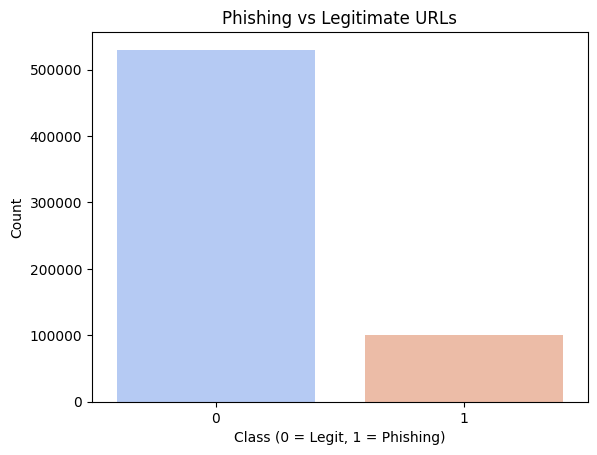

In [ ]:
sns.countplot(x=data['Phising'], palette="coolwarm")
plt.title("Phishing vs Legitimate URLs")
plt.xlabel("Class (0 = Legit, 1 = Phishing)")
plt.ylabel("Count")
plt.show()

### 2. Feature Correlation Heatmap

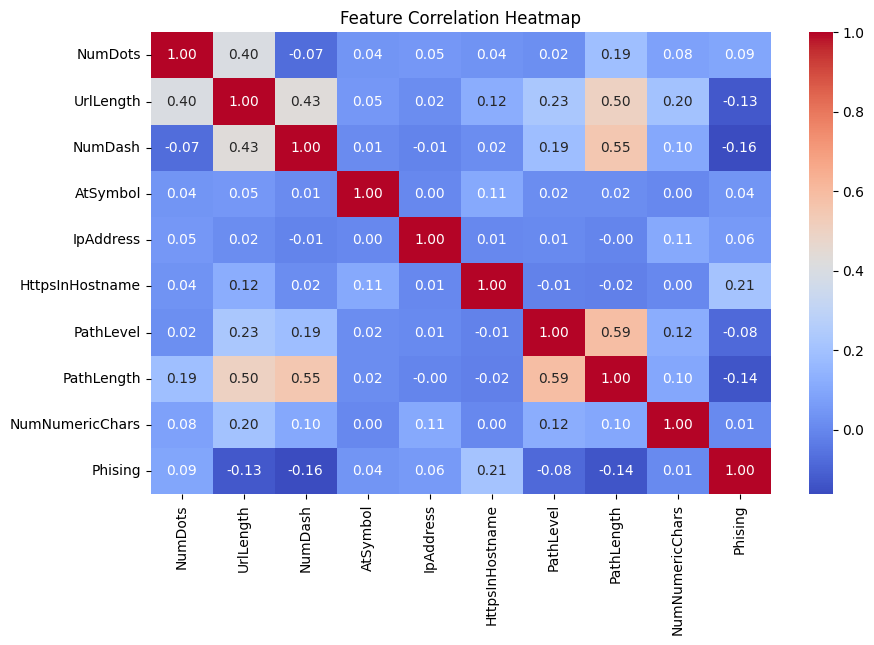

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### 3. Box Plot to Identify Outliers

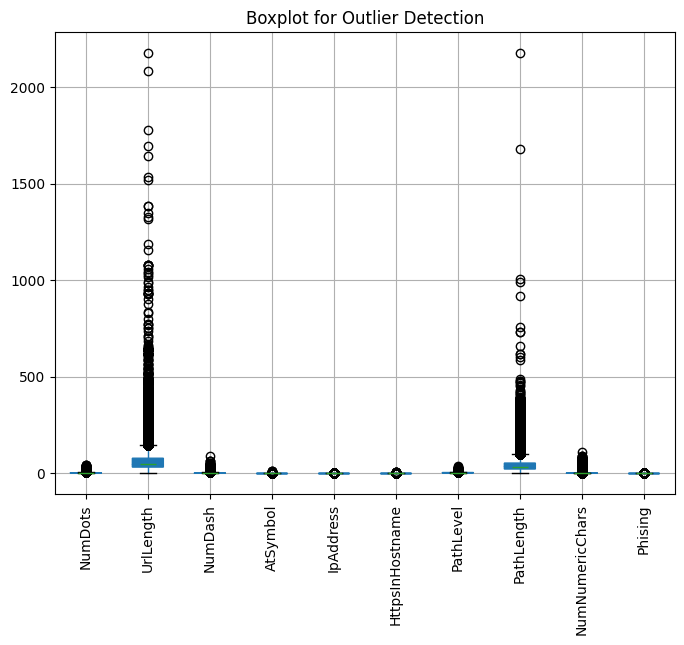

In [ ]:
plt.figure(figsize=(8, 6))
data.boxplot(rot=90, patch_artist=True, notch=True)
plt.title("Boxplot for Outlier Detection")
plt.show()

### 4. Pairplot for Feature Relationships

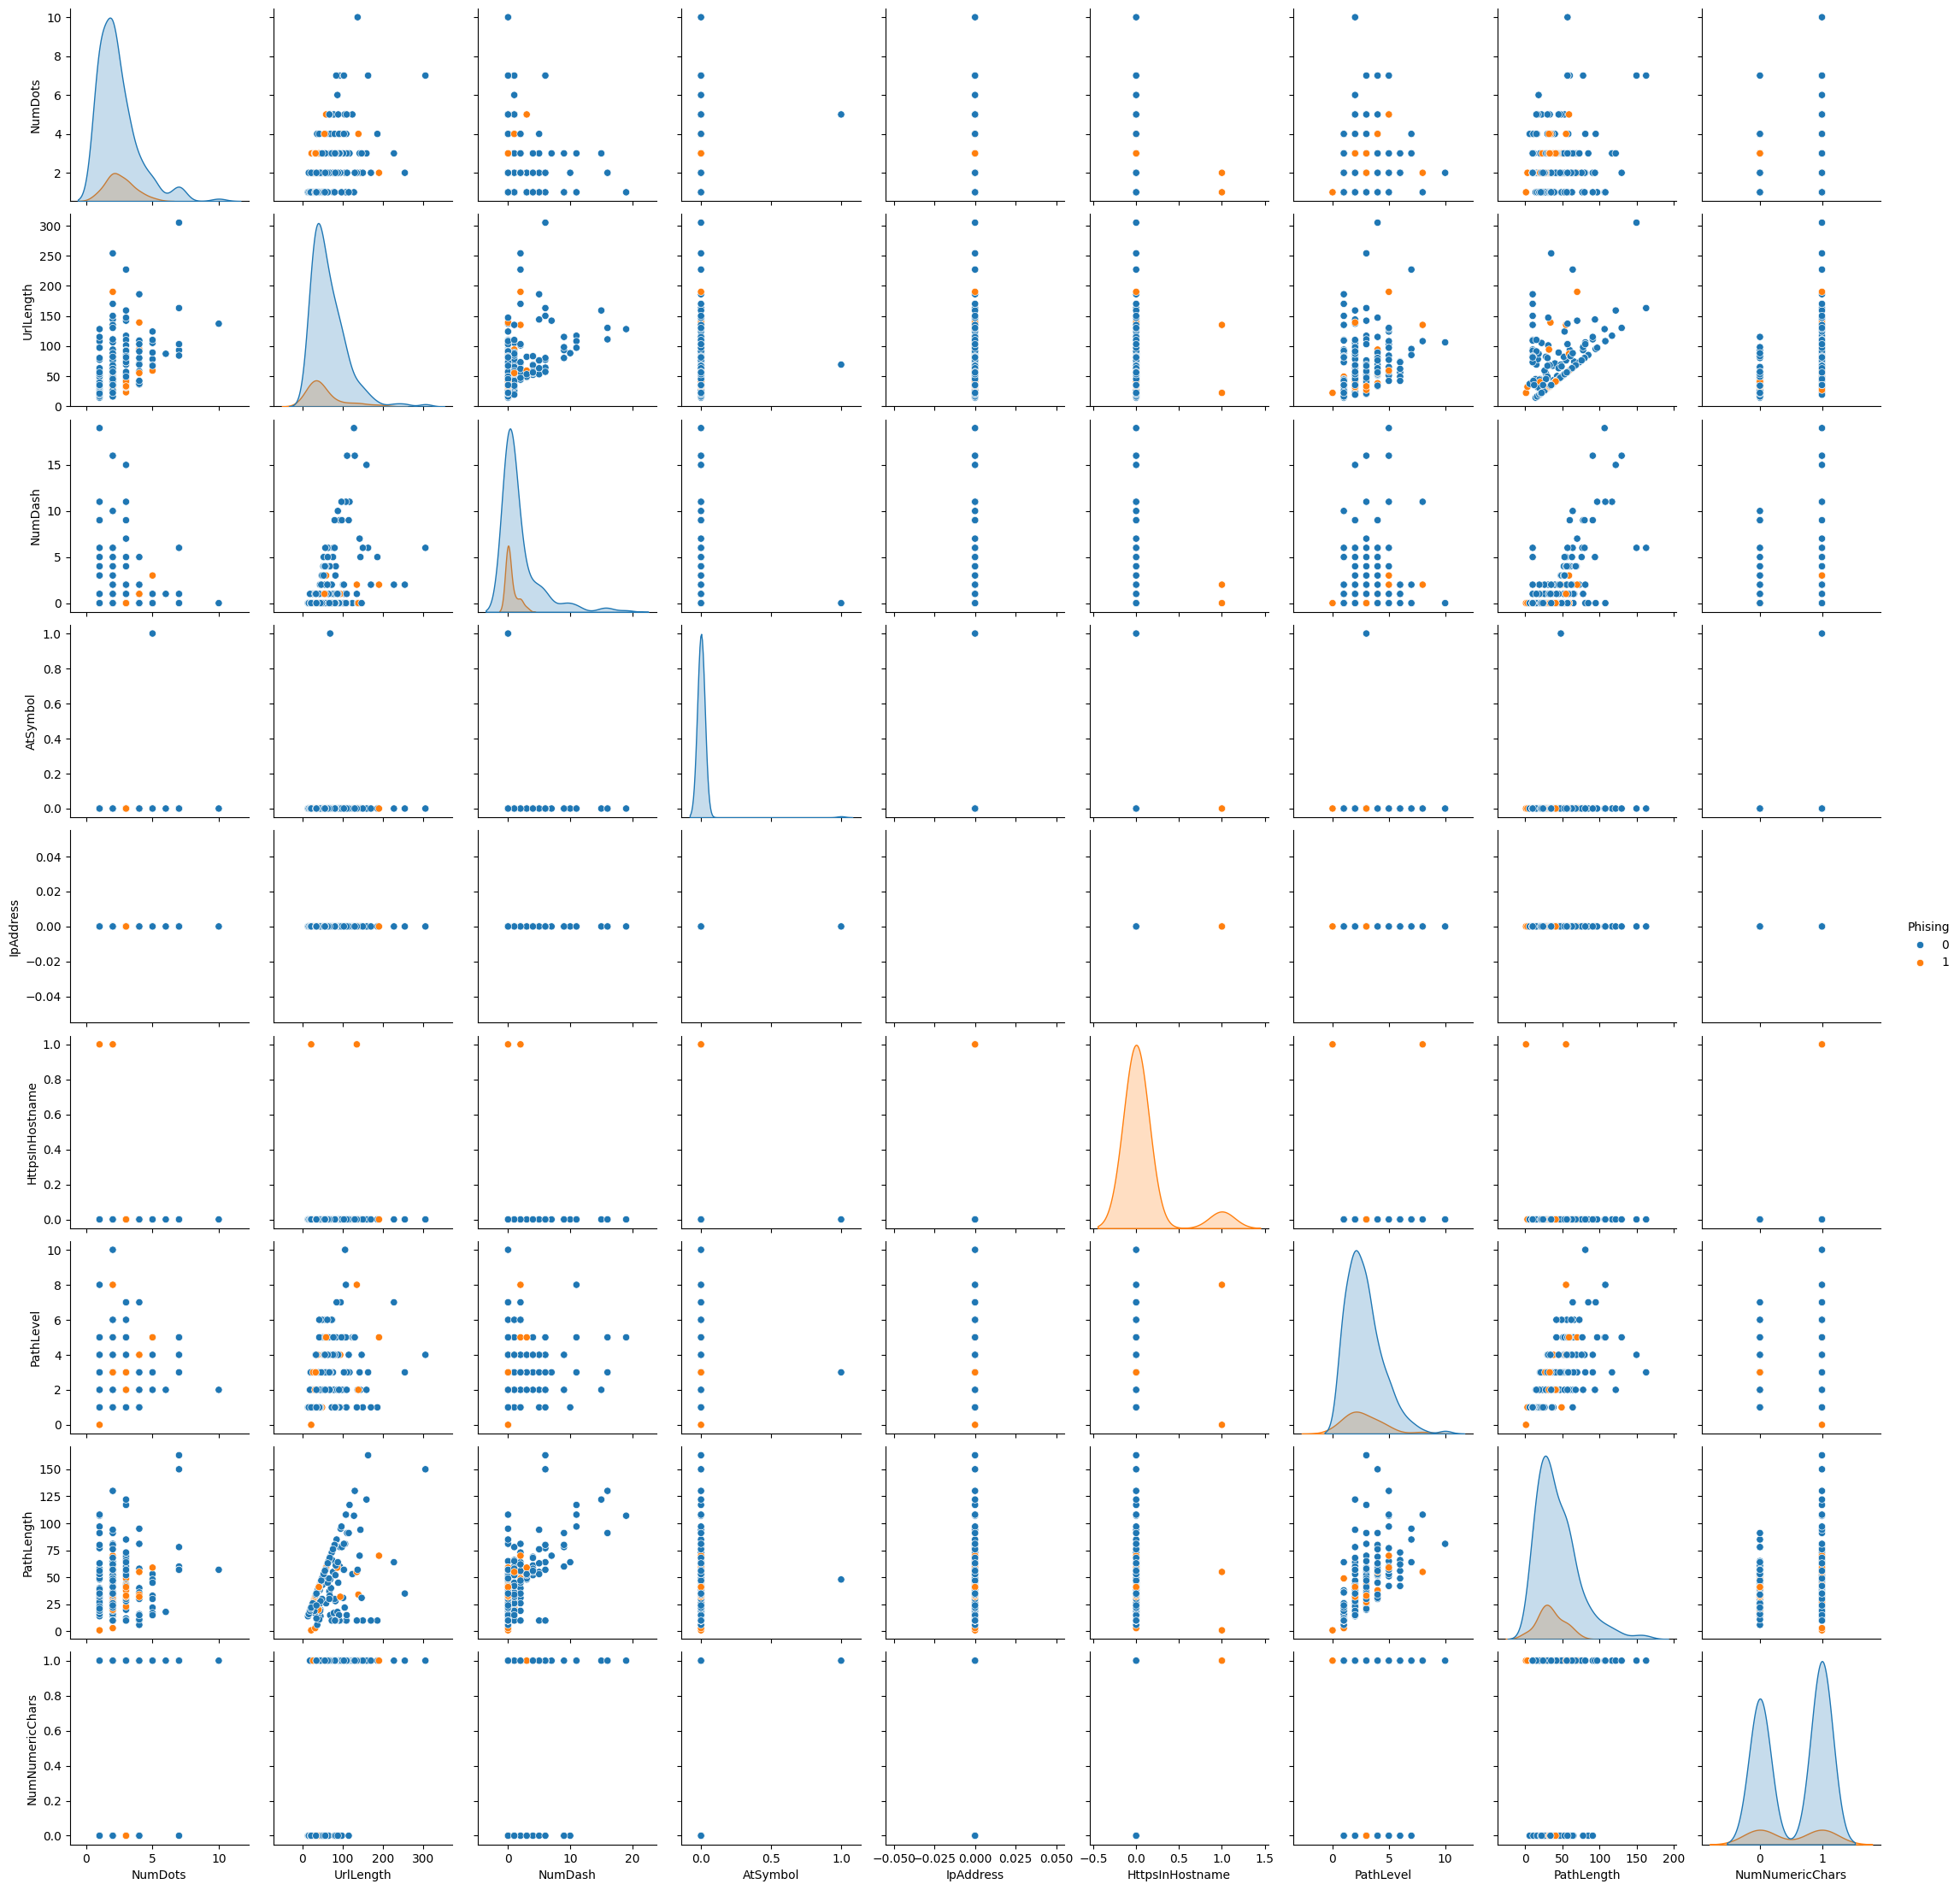

In [ ]:
sns.pairplot(data.sample(200), hue="Phising", diag_kind="kde")
plt.show()

# Step 6: Train-Test Split

In [ ]:
# Define features and target variable
X = data.drop(columns=['Phising'])
y = data['Phising']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Split Completed:")
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Data Split Completed:
Training Data Shape: (504056, 9)
Testing Data Shape: (126015, 9)


# Step 7: Train & Tune Naïve Bayes Model

### 1. Basic Model Training

In [ ]:
# Initialize and train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("\nModel Training Completed")


Model Training Completed


### 2. Hyperparameter Tuning using GridSearchCV

In [ ]:
# Define hyperparameter grid
param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}

# Perform Grid Search
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("\nBest Hyperparameter:", best_params)

# Train final model with best hyperparameters
best_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_model.fit(X_train, y_train)

# Predict using best model
y_pred_best = best_model.predict(X_test)


Best Hyperparameter: {'var_smoothing': 1e-05}


# Step 8: Model Evaluation

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.8477403483712257

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92    105901
           1       0.65      0.10      0.17     20114

    accuracy                           0.85    126015
   macro avg       0.75      0.54      0.54    126015
weighted avg       0.82      0.85      0.80    126015



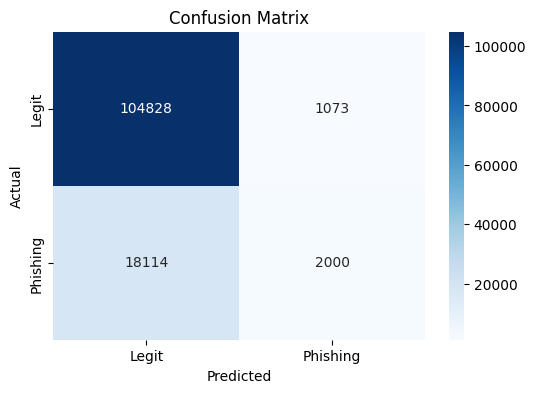

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Phishing"], yticklabels=["Legit", "Phishing"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()